In [10]:
import pandas as pd
import datetime
btc_usd_df = pd.read_csv('../BTC-USD.csv')
btc_usd_df['Date'] = btc_usd_df.apply(lambda row: datetime.datetime.strptime(row['Date'], '%Y-%m-%d').date(), axis=1)
btc_usd_df = btc_usd_df.set_index('Date')
btc_usd_df.tail()

# standarlize data, index as close_date, all lower case

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-25,40075.550781,40254.480469,39545.664062,39933.808594,39933.808594,18491782013
2024-01-26,39936.816406,42209.386719,39825.691406,41816.871094,41816.871094,25598119893
2024-01-27,41815.625000,42195.632812,41431.281250,42120.054688,42120.054688,11422941934
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,42035.593750,16858971687
2024-01-29,42030.914062,43305.867188,41818.332031,43288.246094,43288.246094,20668476578


### 1. Matplot basic 

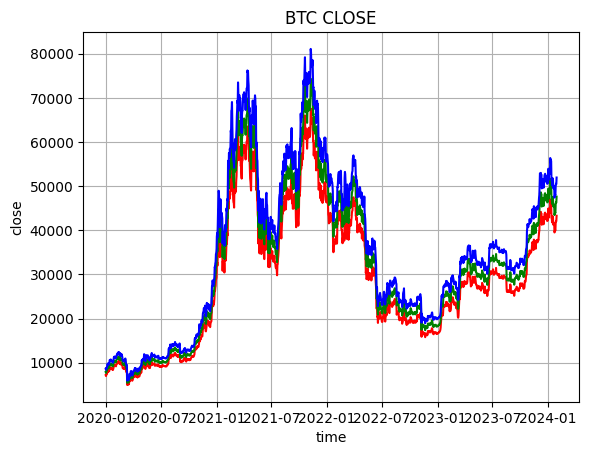

In [13]:
import matplotlib.pyplot as plt
def plot_demo(df, axs=None, just_series=False):
    """
    draw close px 
    :param axs: axs为子画布，稍后会详细讲解
    :param just_series: 是否只绘制一条收盘曲线使用series，后面会用到
    :return: 
    """
    # 如果参数传入子画布则使用子画布绘制，下一节会使用
    drawer = plt if axs is None else axs
    # Series对象tsla_df.close，红色
    drawer.plot(df.Close, c='r')
    if not just_series:
        # 为曲线不重叠，y变量加了10个单位tsla_df.close.values + 10
        # numpy对象tsla_df.close.index ＋ tsla_df.close.values，绿色
        drawer.plot(df.Close.index, df.Close.values*1.1, c='g')
        # 为曲线不重叠，y变量加了20个单位
        # list对象，numpy.tolist()将numpy对象转换为list对象，蓝色
        drawer.plot(df.Close.index.tolist(), (df.Close.values*1.2).tolist(), c='b')

    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('BTC CLOSE')
    plt.grid(True)

plot_demo(btc_usd_df)

### matplotlib子画布及loc的使用

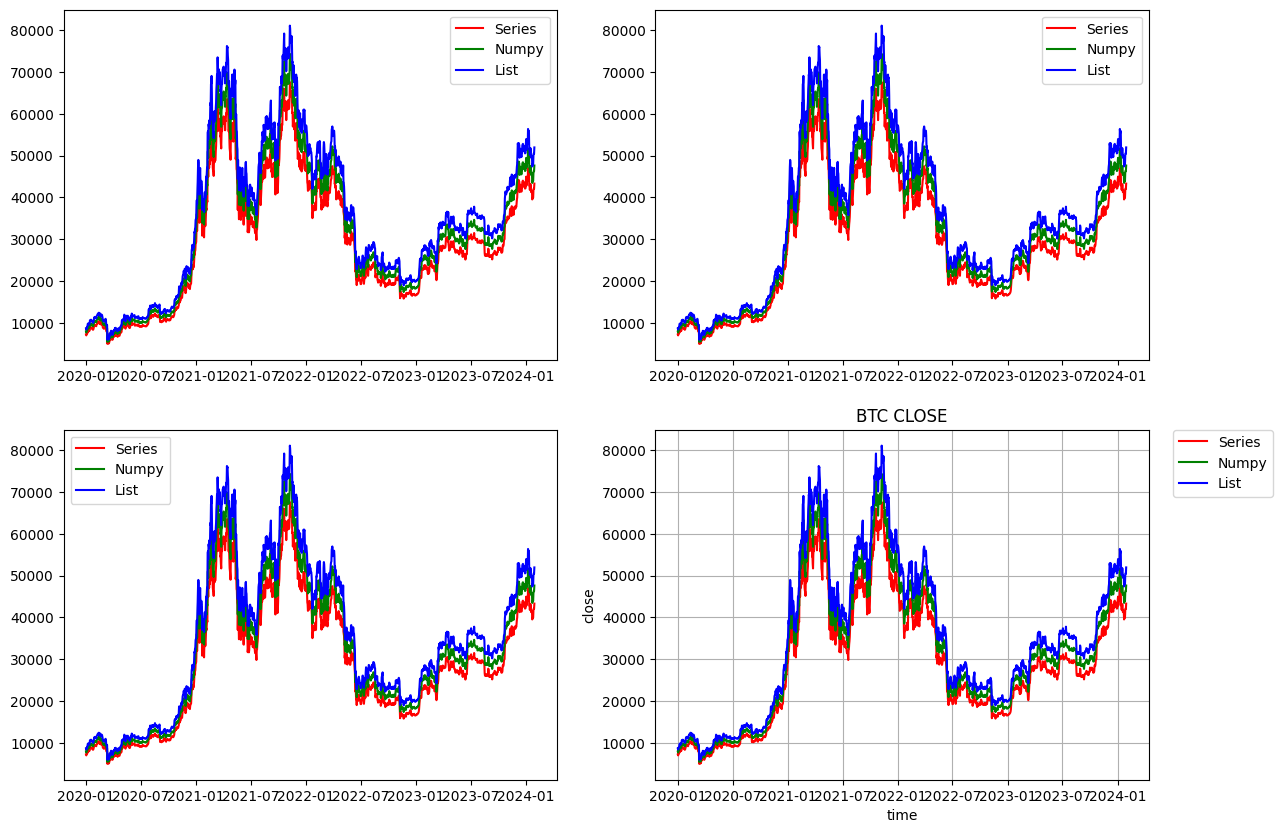

In [14]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# 画布0，loc：0 plot_demo中传入画布，则使用传入的画布绘制
drawer = axs[0][0]
plot_demo(btc_usd_df, drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=0)
# 画布1，loc：1 
drawer = axs[0][1]
plot_demo(btc_usd_df, drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=1)
# 画布2，loc：2 
drawer = axs[1][0]
plot_demo(btc_usd_df, drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=2)
# 画布3，loc：2， 设置bbox_to_anchor，在画布外的相对位置绘制
drawer = axs[1][1]
plot_demo(btc_usd_df, drawer)
drawer.legend(['Series', 'Numpy', 'List'], bbox_to_anchor=(1.05, 1),
              loc=2,
              borderaxespad=0.);

# loc 一般无特殊要求，使用loc='best'指定

### 3. k线图的绘制

In [20]:
import matplotlib.finance as mpf

__colorup__ = "red"
__colordown__ = "green"
# 为了示例清晰，只拿出前30天的交易数据绘制蜡烛图，
btc_part_df = btc_usd_df[:30]
fig, ax = plt.subplots(figsize=(14, 7))
qutotes = []

for index, (d, o, c, h, l) in enumerate(
        zip(btc_part_df.index, btc_part_df.Open, btc_part_df.Close,
            btc_part_df.High, btc_part_df.Low)):
    # 蜡烛图的日期要使用matplotlib.finance.date2num进行转换为特有的数字值
    d = mpf.date2num(d)
    # 日期，开盘，收盘，最高，最低组成tuple对象val
    val = (d, o, c, h, l)
    # 加val加入qutotes
    qutotes.append(val)
# 使用mpf.candlestick_ochl进行蜡烛绘制，ochl代表：open，close，high，low
mpf.candlestick_ochl(ax, qutotes, width=0.6, colorup=__colorup__,
                     colordown=__colordown__)
ax.autoscale_view()
ax.xaxis_date()

ModuleNotFoundError: No module named 'matplotlib.finance'

### 如何计算风险？